<a href="https://colab.research.google.com/github/CoderJuan21/Project-119/blob/main/Project_119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
notfiles = files.upload()

Saving Project-119.csv to Project-119.csv


In [2]:
import pandas as pd

col_names = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Survived","label"]

df = pd.read_csv("Project-119.csv")

print(df.head(6))

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Survived
0            1       3    1  34.5      1      0         0
1            2       1    0  47.0      1      0         1
2            3       3    0  62.0      0      0         1
3            4       1    0  27.0      1      0         1
4            5       3    1  22.0      0      0         0
5            6       3    1  14.0      0      0         0


In [14]:
features = ["PassengerId","Pclass","Sex","Age","SibSp","Parch"]
X = df[features]
y = df.Survived

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy ->", metrics.accuracy_score(y_test, y_pred))

Accuracy -> 0.6902985074626866


In [24]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True ,feature_names = features, class_names = ["0","1"])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengerId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>class = 1>, fillcolor="#81c1ee"] ;
2 -> 3 ;
4 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = 1>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<PassengerId &le; 362.5<br/>gini = 0.463<br/>samples = 11<br/>value = [4, 7]<br/>class = 1>, fillcolor="#aad5f4"] ;
3 -> 5 ;
6 [label=<PassengerId &le; 294.5<br/>gini = 0.49<br/>samples = 7<br/>value

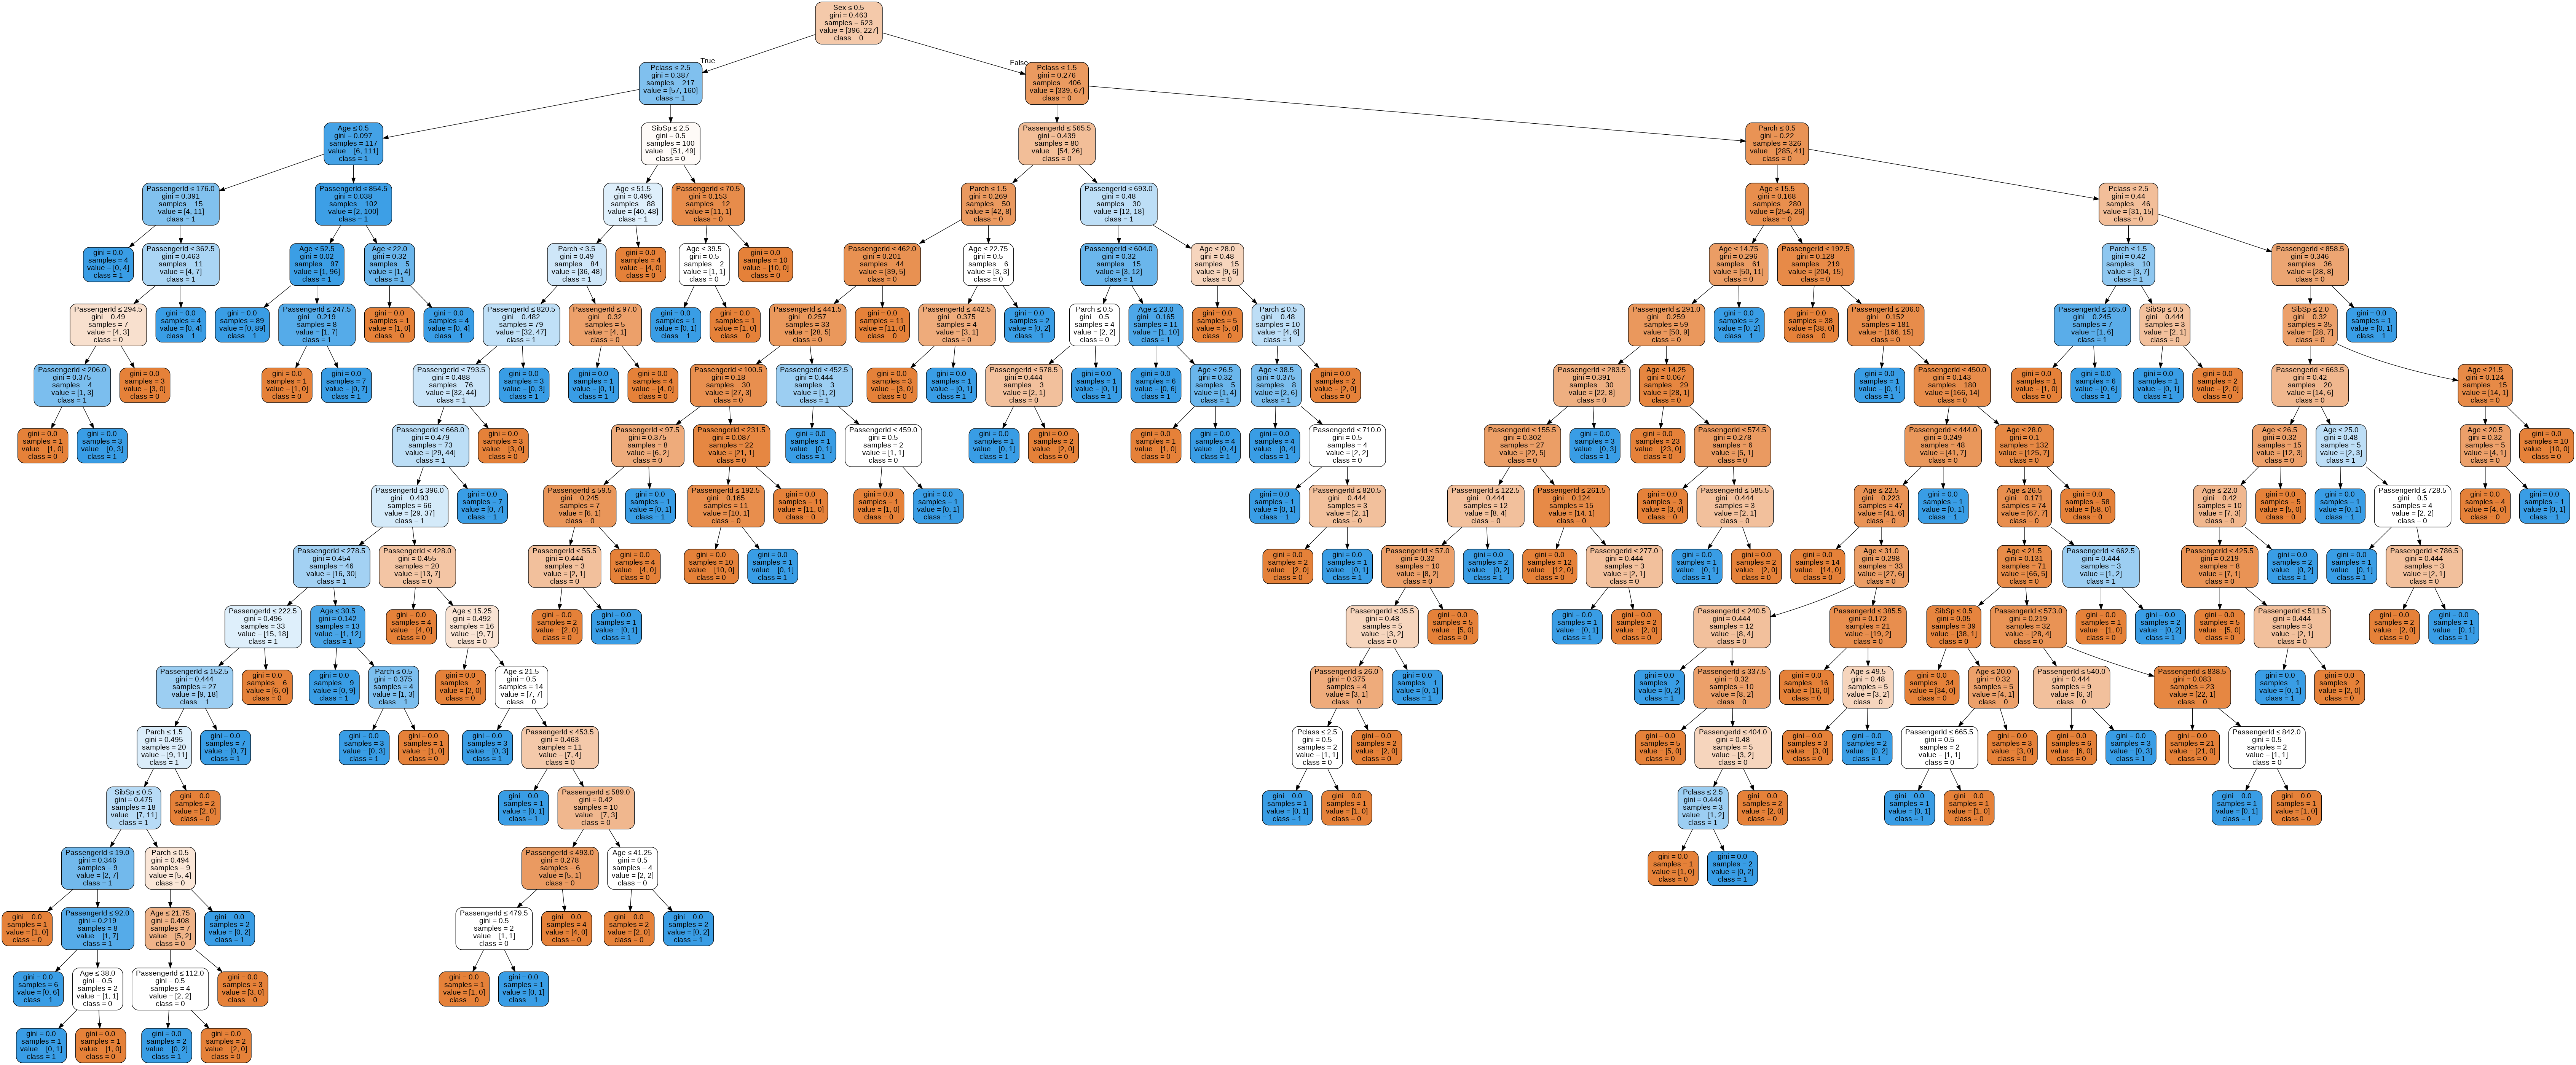

In [25]:
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
Image(graph.create_png())